In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime

def load_dataset(filename):
    with open(filename) as f:
        dataset = json.load(f)

#     _, _, dataset['firmware'] = dataset['firmware'].partition('=')
        
    for sample in dataset['samples']:
        sample['timestamp'] = datetime.fromtimestamp(sample['timestamp'])
    
    return dataset

def slice_dataset(dataset, parameters):
    timestamps = []
    values = []
    
    for s in dataset['samples']:
        try:
            assert not s['error']
            values.append([s[p] for p in parameters])
            timestamps.append(s['timestamp'])
        except KeyError:
            continue
        except AssertionError:
            continue

    return np.array(timestamps), np.array(values)

In [10]:
datasets = dict((name, load_dataset(name + '.json')) for name in ['dev0', 'dev1', 'dev2', 'dev3', 'dev4', 'dev5'])

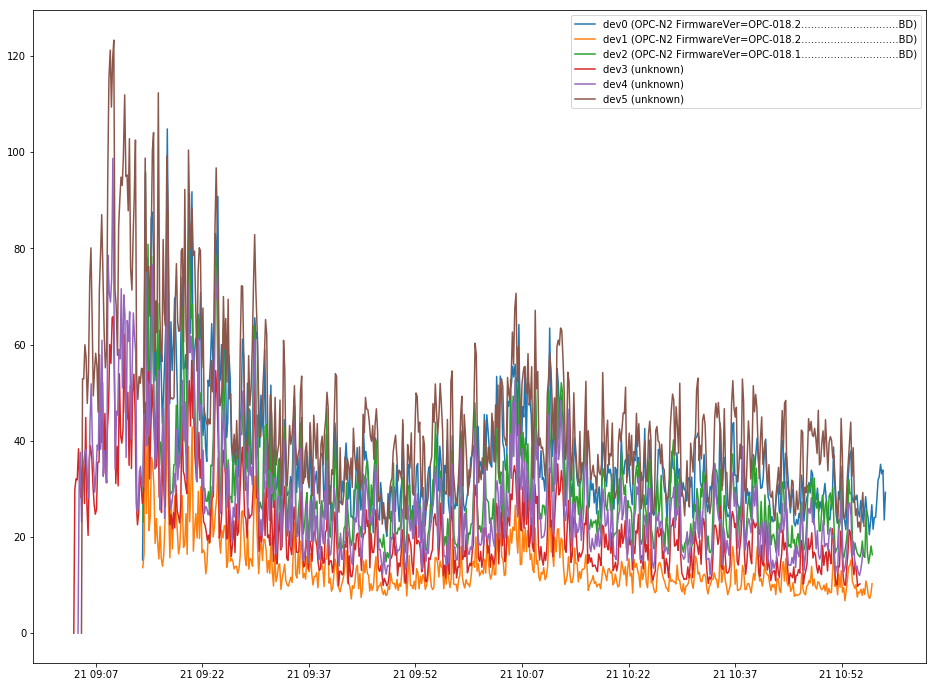

In [12]:
plt.figure(figsize=(16, 12))

for name, dataset in datasets.items():
    t, values = slice_dataset(dataset, ['pm1'])
    plt.plot(t, values[:, 0], label='{} ({})'.format(name, dataset['firmware']))

plt.legend()
plt.show()

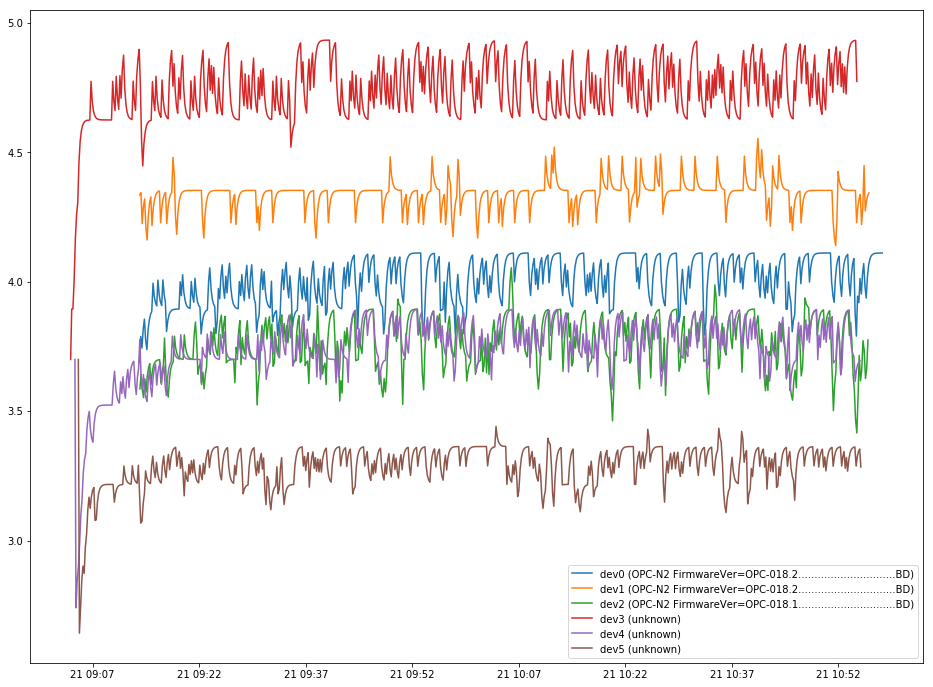

In [13]:
plt.figure(figsize=(16, 12))

for name, dataset in datasets.items():
    t, values = slice_dataset(dataset, ['sample flow rate'])
    plt.plot(t[:], values[:, 0], label='{} ({})'.format(name, dataset['firmware']))

plt.legend()
plt.show()

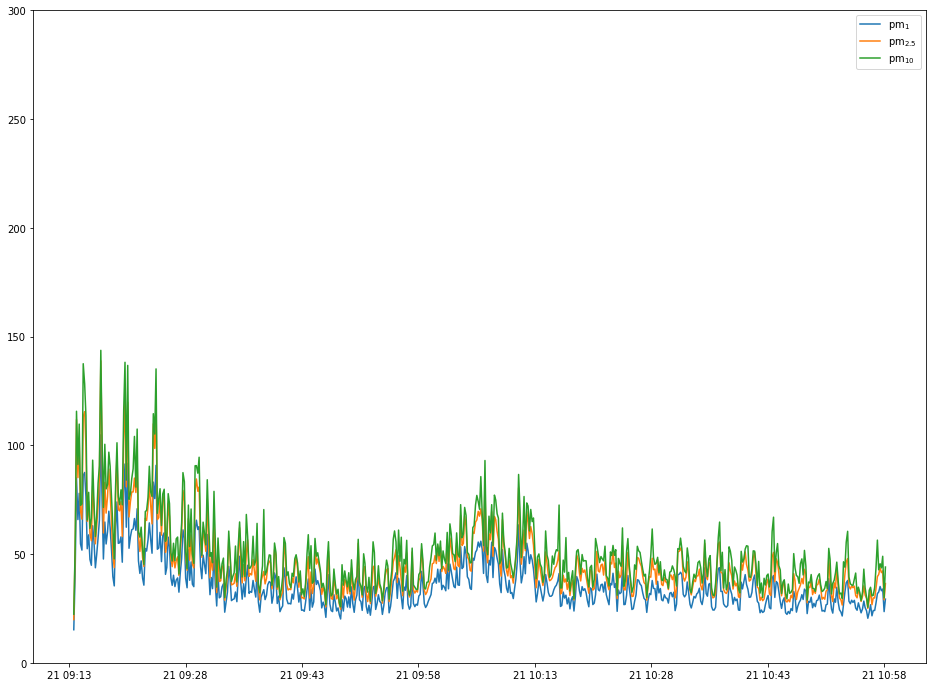

In [14]:
t, values = slice_dataset(datasets['dev0'], ['pm1', 'pm2.5', 'pm10'])

plt.figure(figsize=(16, 12))
plt.ylim(0, 300)
plt.plot(t, values[:, 0], label='pm$_{1}$')
plt.plot(t, values[:, 1], label='pm$_{2.5}$')
plt.plot(t, values[:, 2], label='pm$_{10}$')
plt.legend()
plt.show()